predicting the medical insurance cost using Linear Regression model

Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Data collection and processing

In [3]:
insurance_dataset = pd.read_csv("/content/drive/MyDrive/self_projects/medical_insurance/insurance.csv")
insurance_dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [9]:
insurance_dataset.columns # stating all the columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance_dataset.describe() # statistical measures (only for numerical values but not categorical values)

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [14]:
# checking for null values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
# distribution of categorical data features
print("Gender")
print(insurance_dataset["sex"].value_counts())
print("Smoking people")
print(insurance_dataset["smoker"].value_counts())
print("Region located")
print(insurance_dataset["region"].value_counts())
print("Children category")
print(insurance_dataset["children"].value_counts())

Gender
sex
male      676
female    662
Name: count, dtype: int64
Smoking people
smoker
no     1064
yes     274
Name: count, dtype: int64
Region located
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Children category
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


<ipython-input-17-0b26cec6e9e7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


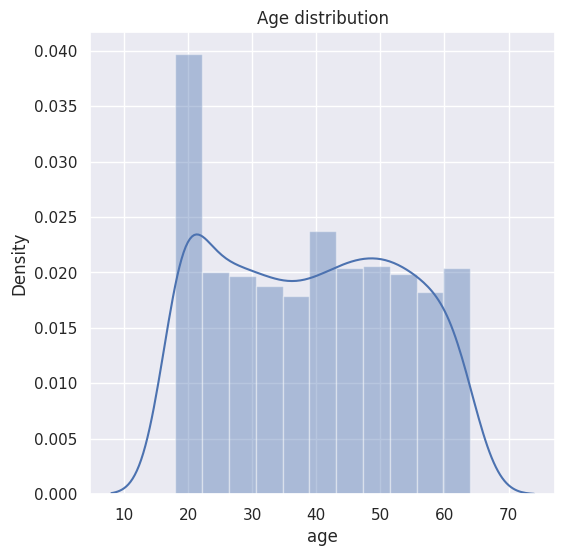

In [17]:
# distribution of age value graphically (for numerical features)
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title("Age distribution")
plt.show()

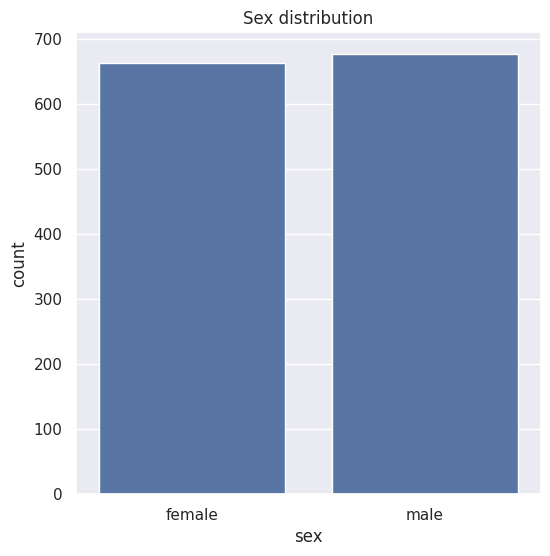

In [19]:
# distribution of sex feature (for categorical we use countplot)
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=insurance_dataset)
plt.title("Sex distribution")
plt.show()

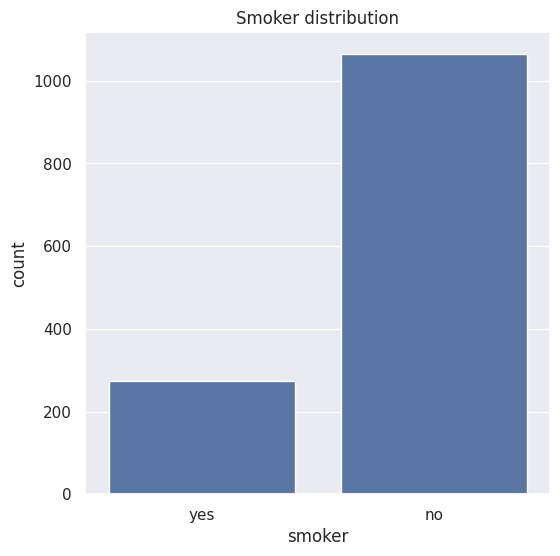

In [20]:
# # visually analyzing the distribution of smoker feature
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = "smoker", data = insurance_dataset)
plt.title("Smoker distribution")
plt.show()

<ipython-input-21-7fe49645a7d3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["bmi"])


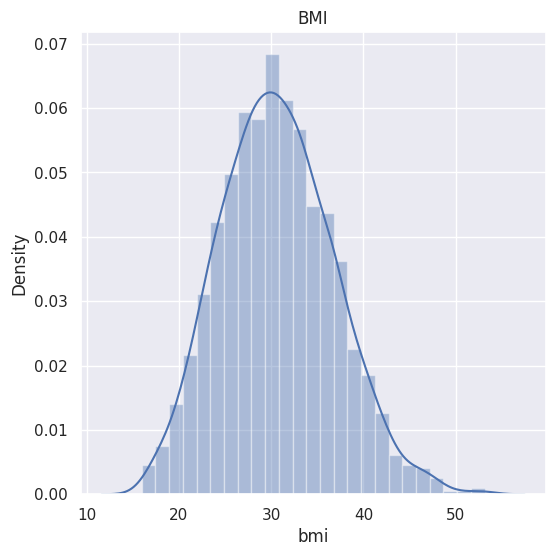

In [21]:
# visually analyzing the distribution of bmi feaure
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["bmi"])
plt.title("BMI")
plt.show()

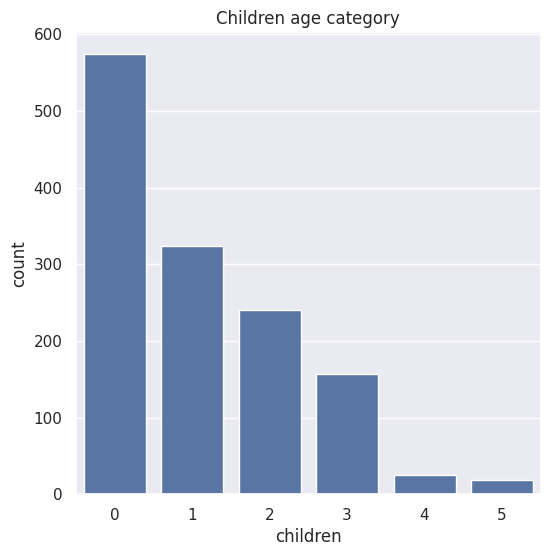

In [24]:
# visually analyzing the distribution of children age category
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = "children", data = insurance_dataset)
plt.title("Children age category")
plt.show()

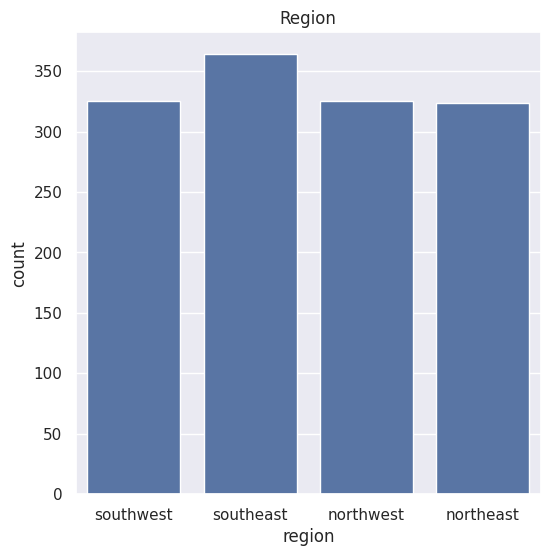

In [25]:
# visually analyzing the distribution of region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = "region", data=insurance_dataset)
plt.title("Region")
plt.show()

Data Preprocessing

In [26]:
# encoding the categorical data
insurance_dataset.replace({"sex": {"male": 0, "female": 1}, "smoker": {"yes": 0, "no": 1}, "region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace=True)

In [28]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


splitting the dataset into features and target

In [29]:
X = insurance_dataset.drop(columns = "charges", axis = 1)
y = insurance_dataset["charges"]

In [30]:
X.shape, y.shape

((1338, 6), (1338,))

Splitting the data training and testing data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [32]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

In [33]:
y.shape, y_train.shape, y_test.shape

((1338,), (1070,), (268,))

Model training

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

Model prediction

In [36]:
# predicting the training data
training_data_pred = lr.predict(X_train)

In [37]:
# predicting the testing data
testing_data_pred = lr.predict(X_test)

Measuring the r2 score

In [38]:
# r2 score of the training data
training_acc = metrics.r2_score(y_train, training_data_pred)
print("R2 score of the training data: ", training_acc)

R2 score of the training data:  0.751505643411174


In [39]:
# r2 score of the testing data
testing_acc = metrics.r2_score(y_test, testing_data_pred)
print("R2 score of the testing dataL ", testing_acc)

R2 score of the testing dataL  0.7447273869684076


Building a predictive system

In [43]:
input_data = (31,1,25.74,0,1,0)
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)
prediction = lr.predict(input_data_reshaped)
print(prediction)
print(f"The predicted insurance cost: {prediction[0]}")

[3760.0805765]
The predicted insurance cost: 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
